In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import numpy.core.defchararray as ss
%matplotlib inline

In [7]:
area = []
normal = []
i = 0
with open('bu.csv', 'r') as f:  
    data = f.readlines()
    for line in data:  
        i = i + 1
        odom = line.split()
        if(i%2==1):area.append(odom)
        else: {
              normal.append(odom)
        }
area = np.array(area)
normal = np.array(normal)

areas = np.zeros((4969,))
for i in range(len(area)):
    areas[i] = float(area[i][0])
    
normals = np.zeros((4969,3))
for i in range(len(normal)):
    t = ss.split(normal[i],',')
    for j in range(len(t[0])):
        normals[i][j] = float(t[0][j])

In [8]:
import pyswarms as ps

def per_calc_support_area(x):
    length = np.sqrt(np.dot(x,x))
    for i in range(len(x)):
        x[i]/=length
    
    tot_area = 0.0
    limit_angle = np.pi*0.25
    for i in range(len(areas)):
        angle_cos = np.dot(normals[i],x)/np.sqrt(np.dot(normals[i],normals[i]))/np.sqrt(np.dot(x,x))
        if angle_cos>=0 and angle_cos > np.cos(limit_angle):
            tot_area += areas[i]*angle_cos   
#     print(x)
#     print(tot_area)
    return tot_area
    
def calc_support_area(x):
    n_particles = x.shape[0]
    j = [per_calc_support_area(x[i]) for i in range(n_particles)]
    return np.array(j)

# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9}

# Call instance of PSO


In [10]:
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=3, options=options)

# Perform optimization
best_cost, best_pos = optimizer.optimize(calc_support_area, iters=15, verbose=3, print_step=2)


INFO:pyswarms.single.global_best:Iteration 1/15, cost: 0.255144481322
INFO:pyswarms.single.global_best:Iteration 3/15, cost: 0.246242846445
INFO:pyswarms.single.global_best:Iteration 5/15, cost: 0.205484061733
INFO:pyswarms.single.global_best:Iteration 7/15, cost: 0.174235071168
INFO:pyswarms.single.global_best:Iteration 9/15, cost: 0.16671985875
INFO:pyswarms.single.global_best:Iteration 11/15, cost: 0.16671985875
INFO:pyswarms.single.global_best:Iteration 13/15, cost: 0.16671985875
INFO:pyswarms.single.global_best:Iteration 15/15, cost: 0.166223849553
INFO:pyswarms.single.global_best:================================
Optimization finished!
Final cost: 0.1662
Best value: [0.75406267706824437, -0.62340991869756435, -0.20675964867973884]



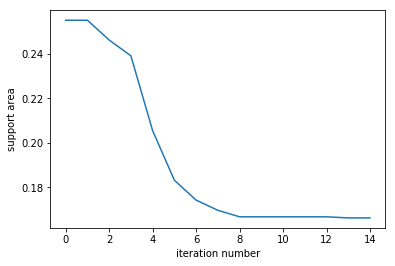

In [26]:
itera = [i for i in range(15)]
plt.plot(itera, optimizer.get_cost_history)
plt.xlabel('iteration number')
plt.ylabel('support area')